This notebook is the class exercise based on my project. The notebook will walk students through a series of data wrangling tasks. I would suggest only providing the code in the first cell to initalize the packages need and nothing more. Selective hints will be in the markdown cells to aid students on certain parts of the tasks. Note slight tweaks to the code will be need as I built this notebook to handle a small portion of the overall time frame of data. After initally building the worksheet I realized that I would require students to read in the weather data and build an empty column in the data frame. I have a few code issues that still won't work even thoug I took them directly from my project notebooks.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob

Step 1. Read in and combine the 5 ventilation system controller data files. Hint the encoding parameter must be changed from the default value for the read_csv to correctly read in the data. Start with a single file reading in to find the correct version needed.

In [11]:
df = pd.concat([pd.read_csv(f, encoding = "utf-16", sep =';', parse_dates=[['59@46@','10000']]) for f in glob.glob('G_*.csv')])
df.head()

,59@46@_10000,amb rh,barn temp,fan percent control,fan percent actual,fan pressure,barn rh,filter pressure[1],fan kwh[1]
0,2019-05-21 13:57:01,3.0,8.6,100.0,79.0,101.0,101.0,49.0,3554.0
1,2019-05-21 13:58:01,3.0,8.7,100.0,64.0,94.0,101.0,46.0,3558.0
2,2019-05-21 13:59:01,3.0,8.6,100.0,75.0,104.0,101.0,52.0,3563.0
3,2019-05-21 14:00:01,3.0,8.7,100.0,71.0,97.0,101.0,47.0,3567.0
4,2019-05-21 14:01:01,3.0,8.7,100.0,64.0,90.0,101.0,44.0,3571.0


In [12]:
#rename the columns in the data frame
df.columns = ['Date_Time','ambrh', 'barntempC','fan%ct','fan%act','fandp','barnRH','filterdp','fankWh']
df.head()

,Date_Time,ambrh,barntempC,fan%ct,fan%act,fandp,barnRH,filterdp,fankWh
0,2019-05-21 13:57:01,3.0,8.6,100.0,79.0,101.0,101.0,49.0,3554.0
1,2019-05-21 13:58:01,3.0,8.7,100.0,64.0,94.0,101.0,46.0,3558.0
2,2019-05-21 13:59:01,3.0,8.6,100.0,75.0,104.0,101.0,52.0,3563.0
3,2019-05-21 14:00:01,3.0,8.7,100.0,71.0,97.0,101.0,47.0,3567.0
4,2019-05-21 14:01:01,3.0,8.7,100.0,64.0,90.0,101.0,44.0,3571.0


Step 2. Sort the data frame by the date and time with the oldest values first

In [13]:
df1=df.sort_values(by='Date_Time')
df1.head()

,Date_Time,ambrh,barntempC,fan%ct,fan%act,fandp,barnRH,filterdp,fankWh
0,2019-04-25 18:12:01,44.0,18.4,100.0,85.0,110.0,101.0,57.0,4570.0
1,2019-04-25 18:13:01,43.0,18.4,100.0,84.0,108.0,101.0,56.0,4574.0
2,2019-04-25 18:14:01,43.0,18.4,100.0,85.0,109.0,101.0,56.0,4579.0
3,2019-04-25 18:15:01,44.0,18.4,100.0,86.0,107.0,101.0,57.0,4583.0
4,2019-04-25 18:16:01,44.0,18.4,100.0,83.0,107.0,101.0,56.0,4587.0


In [47]:
df2a=df1.set_index(pd.DatetimeIndex(df1.Date_Time))
df2a1=df2a.drop(['Date_Time'],axis=1)
#df2a11=df2a1.resample('1T').interpolate(method='linear', axis =0)
#df2a11.head()
df2a1.head()
#some major error in the resample code. The seconds are off by one causing the merge code to list nan for the weather data.

,ambrh,barntempC,fan%ct,fan%act,fandp,barnRH,filterdp,fankWh
Date_Time,,,,,,,,
2019-04-25 18:12:01,44.0,18.4,100.0,85.0,110.0,101.0,57.0,4570.0
2019-04-25 18:13:01,43.0,18.4,100.0,84.0,108.0,101.0,56.0,4574.0
2019-04-25 18:14:01,43.0,18.4,100.0,85.0,109.0,101.0,56.0,4579.0
2019-04-25 18:15:01,44.0,18.4,100.0,86.0,107.0,101.0,57.0,4583.0
2019-04-25 18:16:01,44.0,18.4,100.0,83.0,107.0,101.0,56.0,4587.0


Let's go ahead and visualize cuz why not.

In [14]:
import seaborn as sns

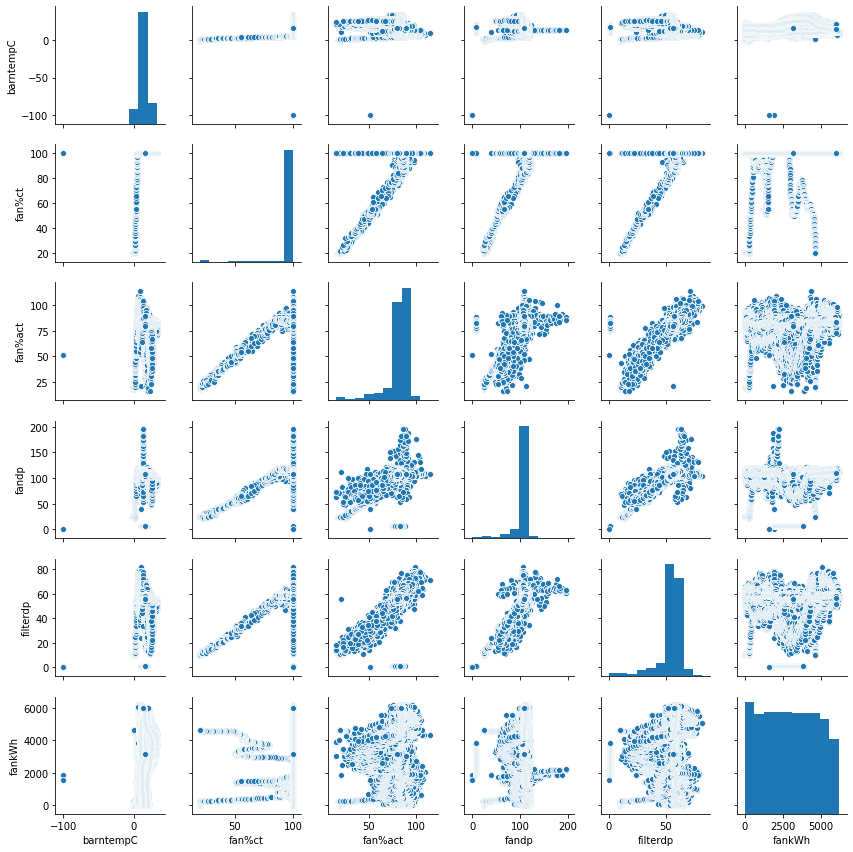

In [37]:
#drop out the RH columns as the values are not valid
df2a1 = df2a.drop(['ambrh','barnRH'],axis=1)
df2a1.head()
#pairwise plot
sns.pairplot(df2a1, height=2.0)

In [24]:
# next step read in the weather data file
dfa1 = pd.read_csv('weather_data_processed')
dfa1.to_csv('weather_data_processed.csv')

In [29]:
dfb1=dfa1.set_index(pd.DatetimeIndex(dfa1.Date_Time))
dfb2= dfb1.drop(['Date_Time'],axis=1)
dfb2.head()

,Tamb,RHamb,winddir,windspd
Date_Time,,,,
2019-01-01 00:15:00,15.8,85.4,330.0,19.55
2019-01-01 00:16:00,15.8,85.4,330.0,19.55
2019-01-01 00:17:00,15.8,85.4,330.0,19.55
2019-01-01 00:18:00,15.8,85.4,330.0,19.55
2019-01-01 00:19:00,15.8,85.4,330.0,19.55


In [38]:
dfa21 = pd.merge(left=df2a1, right=dfb2, how = 'left', left_on='Date_Time',  right_on='Date_Time')
dfa21.head()

,barntempC,fan%ct,fan%act,fandp,filterdp,fankWh,Tamb,RHamb,winddir,windspd
Date_Time,,,,,,,,,,
2019-04-25 18:12:01,18.4,100.0,85.0,110.0,57.0,4570.0,NaN,NaN,NaN,NaN
2019-04-25 18:13:01,18.4,100.0,84.0,108.0,56.0,4574.0,NaN,NaN,NaN,NaN
2019-04-25 18:14:01,18.4,100.0,85.0,109.0,56.0,4579.0,NaN,NaN,NaN,NaN
2019-04-25 18:15:01,18.4,100.0,86.0,107.0,57.0,4583.0,NaN,NaN,NaN,NaN
2019-04-25 18:16:01,18.4,100.0,83.0,107.0,56.0,4587.0,NaN,NaN,NaN,NaN


In [56]:
df1['Pre-filterRH']=""
df1['Pre-filterRH']=np.nan
fill_value = df1['ambrh']*0.88050818+4.10875729
df1['Pre-filterRH']=df1['Pre-filterRH'].fillna(fill_value)
df1.head()

,Date_Time,ambrh,barntempC,fan%ct,fan%act,fandp,barnRH,filterdp,fankWh,Pre-filterRH
0,2019-04-25 18:12:01,44.0,18.4,100.0,85.0,110.0,101.0,57.0,4570.0,42.851117
1,2019-04-25 18:13:01,43.0,18.4,100.0,84.0,108.0,101.0,56.0,4574.0,41.970609
2,2019-04-25 18:14:01,43.0,18.4,100.0,85.0,109.0,101.0,56.0,4579.0,41.970609
3,2019-04-25 18:15:01,44.0,18.4,100.0,86.0,107.0,101.0,57.0,4583.0,42.851117
4,2019-04-25 18:16:01,44.0,18.4,100.0,83.0,107.0,101.0,56.0,4587.0,42.851117
